# Predicting bike sharing demand using recurrent neural networks

## 1.Import all the required libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Import Keras Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## 2.Load the required dataset

In [24]:
chicago_bike_data = pd.read_csv('data.csv')

In [4]:
chicago_bike_data.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,30/06/2014 23:57,01/07/2014 00:07,...,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15,303,Broadway & Cornelia Ave,41.945512,-87.645980,15
1,2355133,2014,6,27,0,23,Subscriber,Male,30/06/2014 23:56,01/07/2014 00:00,...,282,Halsted St & Maxwell St,41.864580,-87.646930,15,22,May St & Taylor St,41.869482,-87.655486,15
2,2355130,2014,6,27,0,23,Subscriber,Male,30/06/2014 23:33,30/06/2014 23:35,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19,225,Halsted St & Dickens Ave,41.919936,-87.648830,15
3,2355129,2014,6,27,0,23,Subscriber,Female,30/06/2014 23:26,01/07/2014 00:24,...,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19,194,State St & Wacker Dr,41.887155,-87.627750,11
4,2355128,2014,6,27,0,23,Subscriber,Female,30/06/2014 23:16,30/06/2014 23:26,...,320,Loomis St & Lexington St,41.872187,-87.661501,15,134,Peoria St & Jackson Blvd,41.877749,-87.649633,19


## 3.Group the data by an hour of rental demand

In [9]:
data_groupby_day_out = pd.DataFrame(chicago_bike_data.groupby(['from_station_name', 'week','day','hour'])['trip_id'].count()).reset_index()
data_groupby_day_in = pd.DataFrame(chicago_bike_data.groupby(['to_station_name','week','day','hour'])['trip_id'].count()).reset_index()
data_groupby_day_out= data_groupby_day_out.rename(columns={"trip_id": "Number Of Outgoing Trips",
                                                    "from_station_name":"Station Name"})
data_groupby_day_in = data_groupby_day_in.rename(columns={"trip_id": "Number Of Incoming Trips",
                                                    "to_station_name":"Station Name"})

In [10]:
new_df=pd.merge(data_groupby_day_out,data_groupby_day_in,on=['Station Name','week','day','hour'],how='outer')
new_df = new_df.sort_values(['week','day','hour'], ascending=True).reset_index()

In [11]:
new_clinton_df = new_df.loc[new_df['Station Name']=='Clinton St & Washington Blvd']
new_clinton_df = new_clinton_df.sort_values(['week','day'], ascending=True)

In [12]:
new_clinton_df

,index,Station Name,week,day,hour,Number Of Outgoing Trips,Number Of Incoming Trips
169,106103,Clinton St & Washington Blvd,1,3,6,1.0,NaN
189,106104,Clinton St & Washington Blvd,1,3,7,3.0,1.0
246,507051,Clinton St & Washington Blvd,1,3,8,NaN,2.0
267,106105,Clinton St & Washington Blvd,1,3,9,1.0,NaN
282,106106,Clinton St & Washington Blvd,1,3,10,1.0,NaN
343,507052,Clinton St & Washington Blvd,1,4,5,NaN,1.0
345,106107,Clinton St & Washington Blvd,1,4,6,1.0,NaN
348,106108,Clinton St & Washington Blvd,1,4,7,1.0,NaN
373,106109,Clinton St & Washington Blvd,1,5,10,1.0,NaN
416,507053,Clinton St & Washington Blvd,1,5,12,NaN,1.0


## 4.Data Preprocessing

#### 4.1 Data Cleaning (replace NaN with 0)

In [13]:
new_clinton_df['Number Of Outgoing Trips'] = new_clinton_df['Number Of Outgoing Trips'].fillna(0)
new_clinton_df['Number Of Incoming Trips'] = new_clinton_df['Number Of Incoming Trips'].fillna(0)

#### 4.2. Renaming Columns

In [14]:
new_clinton_df = new_clinton_df.rename(columns={"Number Of Outgoing Trips":"X_rent","Number Of Incoming Trips":"X_return"})

#### 4.3. Feature Selection

In [15]:
new_clinton_df = new_clinton_df.iloc[:,2:6]

In [16]:
new_clinton_df

,week,day,hour,X_rent
169,1,3,6,1.0
189,1,3,7,3.0
246,1,3,8,0.0
267,1,3,9,1.0
282,1,3,10,1.0
343,1,4,5,0.0
345,1,4,6,1.0
348,1,4,7,1.0
373,1,5,10,1.0
416,1,5,12,0.0


#### 4.3. Handling Missing data(assign 0 to all missing day, hour and X_rent)

In [25]:
for week in set(new_clinton_df['week']):
    new_clinton_week_df = new_clinton_df.loc[new_clinton_df['week']==week]
    list_of_days =new_clinton_week_df['day']
    print(list_of_days)
    for i in range(0,7):
        if(i not in set(list_of_days)):
            app_df = pd.DataFrame([(week,i,0,0)], columns=['week','day','hour','X_rent'])
            new_clinton_df = new_clinton_df.append(app_df)
            

0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    0
0    1
0    1
0    1
0    1
0    1
0    1
    ..
0    5
0    5
0    5
0    5
0    5
0    5
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
0    6
Name: day, Length: 168, dtype: int64
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       0
0       1
0       1
0       1
0       1
0       1
0       1
       ..
0       5
0       5
0       5
0       5
0       5
0       5
0       6
0       6
0       6
0       6
0       6
0       6
0       6
0       6
0       6
3973    6
0       6
0       6
0       6
0       6
4400    6
0       6
0     

In [19]:
for week in set(new_clinton_df['week']):
    new_clinton_week_df = new_clinton_df.loc[new_clinton_df['week']==week]
    for day in set(new_clinton_week_df['day']):
        new_clinton_day_df = new_clinton_week_df.loc[new_clinton_week_df['day']==day]  
        list_of_hours = new_clinton_day_df['hour']
        for i in range(0,24):    
            if(i not in set(list_of_hours)):
                app_df = pd.DataFrame([(week,day,i,0)], columns=['week','day','hour','X_rent'])
                new_clinton_df = new_clinton_df.append(app_df)

In [20]:
new_clinton_df = new_clinton_df.sort_values(['week','day','hour'], ascending=True)

In [21]:
new_clinton_df

,week,day,hour,X_rent
0,1,0,0,0.0
0,1,0,1,0.0
0,1,0,2,0.0
0,1,0,3,0.0
0,1,0,4,0.0
0,1,0,5,0.0
0,1,0,6,0.0
0,1,0,7,0.0
0,1,0,8,0.0
0,1,0,9,0.0


In [179]:
new_clinton_df.shape

(6216, 4)

In [180]:
training_set = new_clinton_df.loc[new_clinton_df['week']<30].iloc[:,3:4].values
test_set = new_clinton_df.loc[new_clinton_df['week']==30].iloc[:,3:4].values

In [182]:
training_set.shape

(4872, 1)

In [183]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [184]:
X_train = []
y_train = []

#### Reshaping data to equal number of 7*24 timesteps(7 days and 24 hours)

In [185]:
for i in range(7*24, 4872):
    X_train.append(training_set_scaled[i-24*7:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train),np.array(y_train)

In [186]:
X_train.shape

(4704, 168)

In [187]:
y_train.shape

(4704,)

In [205]:
X_train = np.reshape(X_train, (196,24,168))

In [206]:
y_train = np.reshape(y_train,(196,24,1))

In [207]:
X_train.shape

(196, 24, 168)

In [208]:
y_train.shape

(196, 24, 1)

In [209]:
X_train.shape[2]

168

## Building the RNN

In [225]:
regressor = Sequential()

In [226]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
regressor.add(Dropout(0.2))
#Adding second LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#Add third LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#Adding fouth LSTM layer
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [227]:
regressor.add(Dense(units=1))

In [228]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 24, 50)            43800     
_________________________________________________________________
dropout_28 (Dropout)         (None, 24, 50)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 24, 50)            20200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 24, 50)            0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 24, 50)            20200     
_________________________________________________________________
dropout_30 (Dropout)         (None, 24, 50)            0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 24, 50)            20200     
__________

In [230]:
regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [231]:
regressor.fit(X_train, y_train,epochs=50,batch_size=2)

Epoch 1/50
196/196 [==============================] - 5s 26ms/step - loss: 0.0108 - acc: 0.5470
Epoch 2/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0076 - acc: 0.5470
Epoch 3/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0063 - acc: 0.5463
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0050 - acc: 0.5463
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 0.0050 - acc: 0.5468
Epoch 6/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0045 - acc: 0.5461
Epoch 7/50
196/196 [==============================] - 3s 18ms/step - loss: 0.0040 - acc: 0.5470
Epoch 8/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0039 - acc: 0.5466
Epoch 9/50
196/196 [==============================] - 3s 17ms/step - loss: 0.0038 - acc: 0.5466
Epoch 10/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0041 - acc: 0.5461
Epoch 11/50
196/196 [==================

## Making the prediction with test data and visualising the results

In [233]:
test_set

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [21.],
       [68.],
       [42.],
       [26.],
       [ 4.],
       [ 6.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [11.],
       [20.],
       [15.],
       [ 8.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [22.],
       [28.],
       [43.],
       [18.],
       [ 0.],
       [ 3.],
       [ 3.],
       [ 2.],
       [ 1.],
       [ 1.],
       [14.],
       [24.],
       [20.],
       [ 8.],
       [ 4.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [28.],
       [26.],
       [37.],
       [10.],
       [ 5.],
       [ 0.],
       [ 0.],
       [ 2.],
       [ 2.],
       [ 2.],
       [15.],
       [22.],
       [12.],
       [ 6.],
       [ 4.],
       [ 0.],
       [ 0.],
      

#### Gathering previous data to predict test data

In [250]:
dataset_total = pd.concat((new_clinton_df.loc[new_clinton_df['week']<30]['X_rent'],new_clinton_df.loc[new_clinton_df['week']==30]['X_rent']),axis=0)

In [251]:
inputs = dataset_total[len(dataset_total)-len(test_set)-7*24:].values

#### 1D reshaping

In [252]:
inputs = inputs.reshape(-1,1)

In [253]:
inputs.shape

(336, 1)

In [ ]:
X_test = []

#### Reshaping test data to 7*24 equal time steps

In [255]:
for i in range(7*24,336):
    X_test.append(inputs[i-24*7:i,0])
X_test = np.array(X_test)

In [256]:
X_test.shape

(168, 168)

In [257]:
X_test = np.reshape(X_test, (7,24,168))

In [258]:
X_test

array([[[ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 15.,  8.,  0.],
        [ 0.,  0.,  0., ...,  8.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.]],

       [[ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 20.,  8.,  4.],
        [ 0.,  0.,  0., ...,  8.,  4.,  1.],
        [ 0.,  0.,  0., ...,  4.,  1.,  0.]],

       [[ 0.,  0.,  0., ...,  1.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        ...,
        [ 3.,  0.,  1., ..., 12.,  6.,  4.],
        [ 0.,  1.,  0., ...,  6.,  4.,  0.],
        [ 1.,  0.,  0., ...,  4.,  0.,  0.]],

       ...,

       [[ 1.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.

In [267]:
predicted_rental_demand = regressor.predict(X_test)

In [268]:
predicted_rental_demand = predicted_rental_demand.reshape(-1,1)

In [269]:
predicted_rental_demand = sc.inverse_transform(predicted_rental_demand)

In [270]:
predicted_rental_demand

array([[-1.5328944e-01],
       [ 4.6113423e-01],
       [ 1.5608559e+00],
       [ 2.0761452e+00],
       [ 2.0403109e+00],
       [ 9.8801298e+00],
       [ 2.7229130e+01],
       [ 3.7788677e+01],
       [ 3.6836090e+01],
       [ 2.4603195e+01],
       [ 1.0334608e+01],
       [ 5.9244037e+00],
       [ 5.0098219e+00],
       [ 4.6664515e+00],
       [ 4.2543063e+00],
       [ 4.2062855e+00],
       [ 1.5983251e+01],
       [ 2.4585598e+01],
       [ 1.5452167e+01],
       [ 6.4230657e+00],
       [ 3.0054226e+00],
       [ 1.6274729e+00],
       [ 7.4912119e-01],
       [ 3.9931792e-01],
       [ 1.0417823e-01],
       [ 5.9819579e-01],
       [ 1.3658663e+00],
       [ 1.7088444e+00],
       [ 1.5107388e+00],
       [ 5.3245335e+00],
       [ 2.4556301e+01],
       [ 3.7203972e+01],
       [ 3.6272770e+01],
       [ 1.1172092e+01],
       [ 3.7370417e+00],
       [ 3.8771038e+00],
       [ 4.4798827e+00],
       [ 4.5530519e+00],
       [ 4.4043088e+00],
       [ 4.8874474e+00],


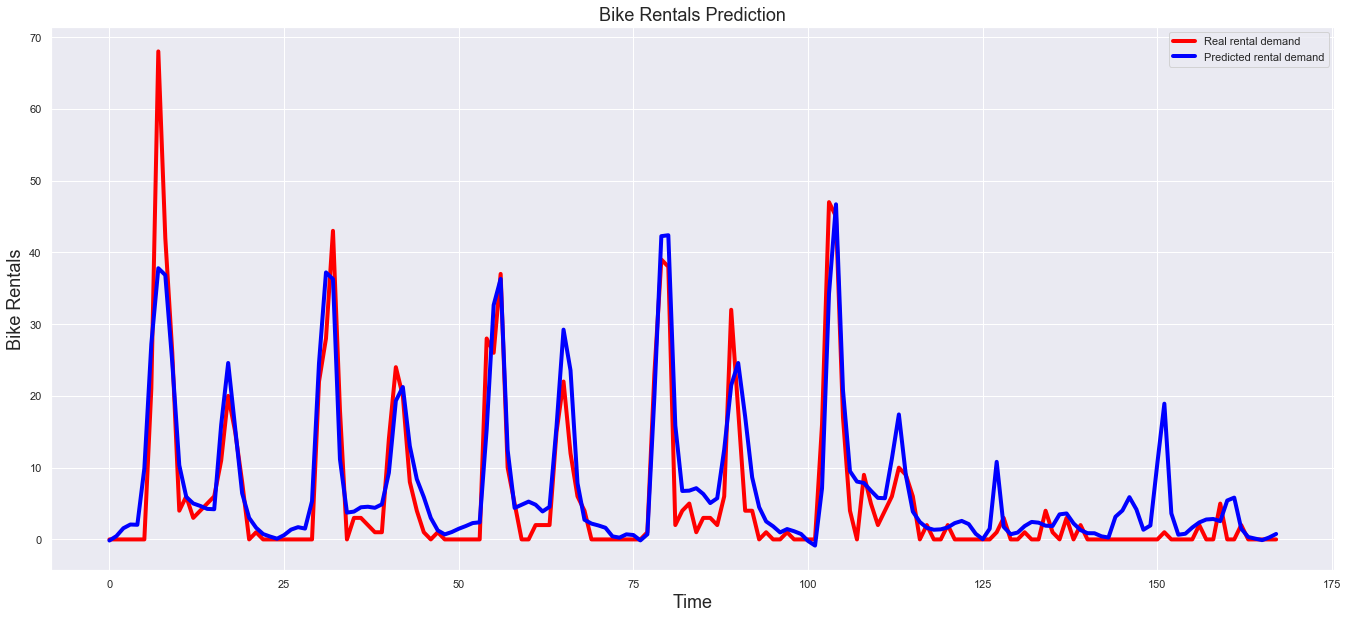

In [308]:
sns.set()
plt.rcParams['figure.figsize'] = [23,10]
plt.plot(test_set,color='red',label='Real rental demand',linewidth=4.0)
plt.plot(predicted_rental_demand,color='blue',label='Predicted rental demand',linewidth=4.0)
plt.title("Bike Rentals Prediction", size=18)
plt.xlabel("Time", size=18)
plt.ylabel("Bike Rentals", size=18)
plt.grid(True)
plt.legend()
plt.show()

In [274]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set, predicted_rental_demand))

In [277]:
rmse

4.922349826699995

In [278]:
dict_lstm = {}

In [279]:
dict_lstm['LSTM']=rmse

In [291]:
boxplot_df = pd.DataFrame.from_dict({'col_1': ['LSTM'], 'col_2': [rmse]})